## Вивчення основних функцій Pandas для аналізу даних.

In [1]:
N = (1 + 4) % 5 + 1
print(N)

1


In [2]:
import pandas as pd
df = pd.read_csv('NationalNames.csv')

| **Варіант** |                          **Номери вправ**                          |
|:-----------:|:------------------------------------------------------------------:|
|      1      | 1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26 |

1. Виведіть перші 8 рядків набору даних.

In [5]:
rows = df.head(8)
print(rows.to_string(index=False))

 Id      Name  Year Gender  Count
  1      Mary  1880      F   7065
  2      Anna  1880      F   2604
  3      Emma  1880      F   2003
  4 Elizabeth  1880      F   1939
  5    Minnie  1880      F   1746
  6  Margaret  1880      F   1578
  7       Ida  1880      F   1472
  8     Alice  1880      F   1414


2. Вивести останні 8 рядків набору даних.

In [19]:
lastКows = df.tail(8)
print(lastКows.to_string(index=False))

     Id    Name  Year Gender  Count
1825426      Zo  2014      M      5
1825427   Zyeir  2014      M      5
1825428    Zyel  2014      M      5
1825429  Zykeem  2014      M      5
1825430  Zymeer  2014      M      5
1825431 Zymiere  2014      M      5
1825432   Zyran  2014      M      5
1825433   Zyrin  2014      M      5


3. Отримайте імена стовпців набору даних

In [6]:
columnNames = df.columns
print(columnNames)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


5. Знайдіть кількість унікальних імен у наборі даних

In [21]:
uniqueСount = df['Name'].nunique()
print(uniqueСcount)

93889


10. Підрахуйте кількість унікальних імен у кожному році

In [22]:
uniqueТamesИyНear = df.groupby('Year')['Name'].nunique().reset_index()
print(uniqueТamesИyНear)

     Year   Name
0    1880   1889
1    1881   1830
2    1882   2012
3    1883   1962
4    1884   2158
..    ...    ...
130  2010  31603
131  2011  31418
132  2012  31236
133  2013  30774
134  2014  30579

[135 rows x 2 columns]


12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [7]:
yearNamesCounts = df.groupby('Year')['Name'].nunique()
maxUniqueYear = yearNamesCounts.idxmax()
uniqueYearNames = df[df['Year'] == maxUniqueYear]
maxYearName = uniqueYearNames[uniqueYearNames['Count'] == uniqueYearNames['Count'].max()]['Name'].iloc[0]
print(f"The name is '{maxYearName}' in {maxUniqueYear}")

The name is 'Jacob' in 2008


13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [8]:
femaleJacobs = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
maxFemaleJacobsYear = femaleJacobs[femaleJacobs['Count'] == femaleJacobs['Count'].max()]
print(maxFemaleJacobsYear.to_string(index=False))

     Id  Name  Year Gender  Count
1455557 Jacob  2004      F    171


14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [9]:
gendersPerNameYear = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
genderNeutralNames = gendersPerNameYear[gendersPerNameYear['Gender'] == 2]
genderNeturalNamesPerYear = genderNeutralNames.groupby('Year')['Name'].count().reset_index()
maxGenderNeturalYear = genderNeturalNamesPerYear[genderNeturalNamesPerYear['Name'] == genderNeturalNamesPerYear['Name'].max()]
maxGenderNeturalYear.columns = ['Year', 'Gender Neutral Names']
print(maxGenderNeturalYear.to_string(index=False))

 Year  Gender Neutral Names
 2008                  2557


15. Знайдіть загальну кількість народжень за рік.

In [10]:
totalBirthsPerYear = df.groupby('Year')['Count'].sum().reset_index()
totalBirthsPerYear.columns = ['Year', 'Count']
print(totalBirthsPerYear.to_string(index=False))

 Year   Count
 1880  201484
 1881  192699
 1882  221538
 1883  216950
 1884  243467
 1885  240855
 1886  255319
 1887  247396
 1888  299480
 1889  288950
 1890  301402
 1891  286678
 1892  334383
 1893  325223
 1894  338694
 1895  351028
 1896  357490
 1897  346960
 1898  381463
 1899  339235
 1900  450327
 1901  345819
 1902  386736
 1903  381207
 1904  403496
 1905  423948
 1906  428462
 1907  465399
 1908  488657
 1909  511227
 1910  590719
 1911  644267
 1912  988048
 1913 1137075
 1914 1416310
 1915 1832477
 1916 1934422
 1917 2006791
 1918 2171184
 1919 2110294
 1920 2262746
 1921 2334456
 1922 2289206
 1923 2302498
 1924 2381627
 1925 2333310
 1926 2295809
 1927 2319047
 1928 2260635
 1929 2191735
 1930 2222937
 1931 2103624
 1932 2110802
 1933 1998837
 1934 2076330
 1935 2089358
 1936 2077176
 1937 2130181
 1938 2212118
 1939 2203062
 1940 2302225
 1941 2435860
 1942 2731319
 1943 2821928
 1944 2689659
 1945 2652638
 1946 3194834
 1947 3601867
 1948 3452283
 1949 3484550
 1950 

16. Знайдіть рік, коли народилося найбільше дітей

In [11]:
maxBirthsPerYear = totalBirthsPerYear[totalBirthsPerYear['Count'] == totalBirthsPerYear['Count'].max()]
print(maxBirthsPerYear.iloc[0]['Year'])

1957


17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [13]:
yearGender = df.groupby(['Year', 'Gender'])['Count'].sum().reset_index()
splitGender = yearGender.pivot(index='Year', columns='Gender', values='Count').reset_index()
splitGender.columns = ['Year', 'F', 'M']
print(splitGender.to_string(index=False))

 Year       F       M
 1880   90993  110491
 1881   91954  100745
 1882  107850  113688
 1883  112321  104629
 1884  129022  114445
 1885  133055  107800
 1886  144535  110784
 1887  145982  101414
 1888  178627  120853
 1889  178366  110584
 1890  190377  111025
 1891  185482  101196
 1892  212346  122037
 1893  212906  112317
 1894  222922  115772
 1895  233630  117398
 1896  237920  119570
 1897  234202  112758
 1898  258770  122693
 1899  233023  106212
 1900  299828  150499
 1901  239348  106471
 1902  264077  122659
 1903  261973  119234
 1904  275371  128125
 1905  291629  132319
 1906  295303  133159
 1907  318566  146833
 1908  334313  154344
 1909  347228  163999
 1910  396501  194218
 1911  418299  225968
 1912  558103  429945
 1913  624518  512557
 1914  761548  654762
 1915  983874  848603
 1916 1044323  890099
 1917 1081280  925511
 1918 1157647 1013537
 1919 1130145  980149
 1920 1198283 1064463
 1921 1232999 1101457
 1922 1200919 1088287
 1923 1206330 1096168
 1924 1248

18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [31]:
genderСounts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
yearsWithMoreFemales = (genderСounts['F'] > genderСounts['M']).sum()
print(yearsWithMoreFemales)

54


21. Порахуйте, скільки разів хлопчиків називали Barbara

In [26]:
barbara_male_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print(barbara_male_count)

4139


22. Підрахуйте скільки років проводилось спостереження

In [23]:
observedyears = df['Year'].unique()
totalObservedYears = len(splitGender['Year'])
print(f"Спостереження проводилось {totalObservedYears} років")

Спостереження проводилось 135 років


23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [32]:
gendersPerNameYear = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
genderNeutralNames = gendersPerNameYear[gendersPerNameYear['Gender'] == 2]
mostPopularNeutralNamesPerYear = genderNeutralNames.groupby('Year', as_index=False)['Name'].first()
print(mostPopularNeutralNamesPerYear)

     Year     Name
0    1880    Addie
1    1881    Addie
2    1882    Addie
3    1883    Addie
4    1884    Addie
..    ...      ...
130  2010  Aaliyah
131  2011  Aalijah
132  2012     Aadi
133  2013     Aadi
134  2014  Aalijah

[135 rows x 2 columns]


24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [36]:
nameCounts = df.groupby('Name')['Count'].sum().reset_index()
leastPopularName = nameCounts.loc[nameCounts['Count'].idxmin()]
mostPopularAmongUnpopular = df[df['Name'] == leastPopularName['Name']]
result = f"Ім'я: {leastPopularName['Name']}, кількість разів: {leastPopularName['Count']}"
print(result)

Ім'я: Aabid, кількість разів: 5


26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

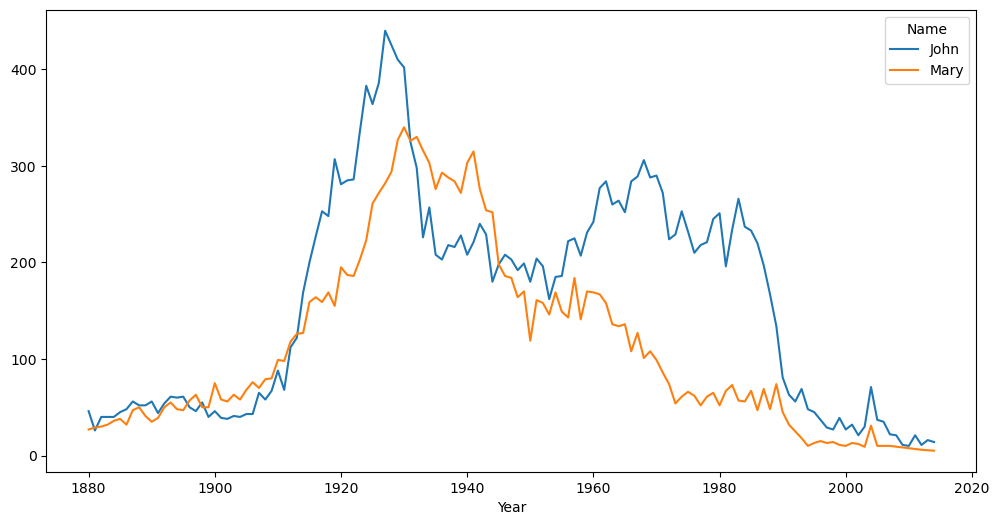

In [17]:
import matplotlib.pyplot as plt

femaleJohns = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
maleMarys = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]
femaleJohnsPerYear = femaleJohns.groupby('Year')['Count'].sum()
maleMarysPerYear = maleMarys.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(femaleJohnsPerYear.index, femaleJohnsPerYear.values, label='John')
plt.plot(maleMarysPerYear.index, maleMarysPerYear.values, label='Mary')
plt.xlabel('Year')
plt.legend(title = 'Name')
plt.show()